In [2]:
import pymysql

connector = pymysql.connect(user='dev', password='ax2',host='127.0.0.1',port=3307,db='pythonexam')
cursor = connector.cursor()

query = ('SELECT country, total_cases, total_deaths, total_tests from corona20200515 WHERE LENGTH(total_cases) > 6 and not country = %s and not country = %s and not country = %s and not country = %s and not country = %s and not country = %s and not country = %s and not country = %s and not country = %s')
where_not = "North America", "Asia", "South America", "Europe", "World", "Total:", "Africa", "Oceania", "South Africa"
cursor.execute(query, where_not)

countries = []
cases_total = []
deaths_total =[]
tests_total = []
for country,c , d , t in cursor:
    countries.append(country)
    cases = c.replace(',','')
    deaths = d.replace(',','')
    tests = t.replace(',','')
    c_int = int(cases)
    d_int = int(deaths)
    t_int = int(tests)
    cases_total.append(c_int)
    deaths_total.append(d_int)
    tests_total.append(t_int)
    #print(tests_1mio)
    
cursor.close()
connector.close()

In [3]:
import pandas as pd

df = pd.DataFrame({'Total Cases': cases_total, 'Total Deaths': deaths_total, 'Total Tests': tests_total},countries)
df

,Total Cases,Total Deaths,Total Tests
USA,1457649,86912,10639178
Spain,274367,27459,2467761
Russia,262843,2418,6413948
UK,233151,33614,2219281
Italy,223096,31368,2807504
Brazil,203165,13999,735224
France,178870,27425,1384633
Germany,174975,7928,3147771
Turkey,144749,4007,1508824
Iran,114533,6854,643772


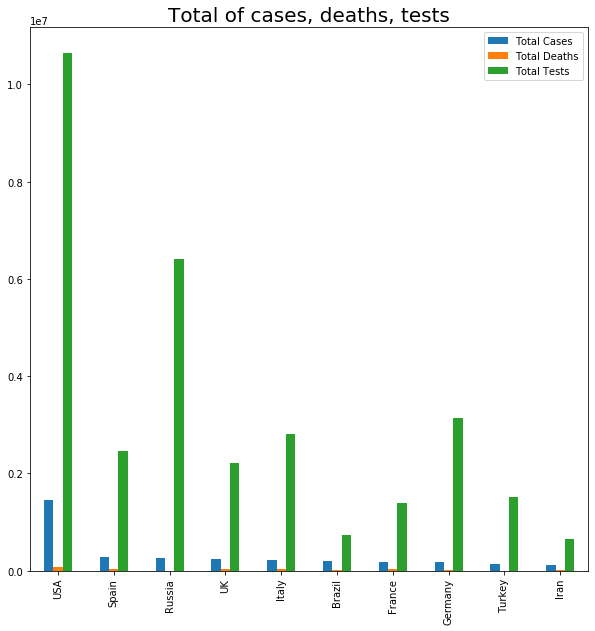

In [4]:
import matplotlib.pyplot as plt

df.plot.bar(figsize=(10,10))
plt.title('Total of cases, deaths, tests', fontsize=20)

plt.show()